In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.9 MB/s eta 0:00:00


In [ ]:
import torch
import textwrap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer
from transformers import BertForQuestionAnswering

In [ ]:
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [ ]:
question = "How many parameters does BERT have ?"
answer = "BERT is really big as it has 24 layers and an embedding size of 1024 dimensions for a total of 340 million parameters and it is 1.34 GB in size."

In [ ]:
input_ids = tokenizer.encode(question,answer)

In [ ]:
print("The input has a total of {:} tokens".format(len(input_ids)))

The input has a total of 46 tokens


In [ ]:
tokens = tokenizer.convert_ids_to_tokens(input_ids)

In [ ]:
for token,id in zip(tokens,input_ids):
  if id == tokenizer.sep_token_id:
    print("")
  print("{:<12} {:>6,}".format(token,id))
  if id == tokenizer.sep_token_id:
    print("")

[CLS]           101
how           2,129
many          2,116
parameters   11,709
does          2,515
bert         14,324
have          2,031
?             1,029

[SEP]           102

bert         14,324
is            2,003
really        2,428
big           2,502
as            2,004
it            2,009
has           2,038
24            2,484
layers        9,014
and           1,998
an            2,019
em            7,861
##bed         8,270
##ding        4,667
size          2,946
of            1,997
102           9,402
##4           2,549
dimensions    9,646
for           2,005
a             1,037
total         2,561
of            1,997
340          16,029
million       2,454
parameters   11,709
and           1,998
it            2,009
is            2,003
1             1,015
.             1,012
34            4,090
gb           16,351
in            1,999
size          2,946
.             1,012

[SEP]           102



In [ ]:
separate_index = input_ids.index(tokenizer.sep_token_id)
number_of_segment_a = separate_index + 1
number_of_segment_b = len(input_ids) - number_of_segment_a
segment_ids = [0] * number_of_segment_a + [1] * number_of_segment_b
assert len(segment_ids) == len(input_ids)

In [ ]:
output = model(torch.tensor([input_ids]),token_type_ids = torch.tensor([segment_ids]),return_dict = True)

In [ ]:
start_scores = output.start_logits
end_scores = output.end_logits

In [ ]:
start_answer = torch.argmax(start_scores)
end_answer = torch.argmax(end_scores)
answer = " ".join(tokens[start_answer : end_answer + 1])
print("Answer :",answer)

Answer : 340 million


In [ ]:
sns.set(style = "darkgrid")
plt.rcParams["figure.figsize"] = (16,8)

In [ ]:
start = start_scores.detach().numpy().flatten()
end = end_scores.detach().numpy().flatten()

In [ ]:
token_labels = []

In [ ]:
for i,token in enumerate(tokens):
  token_labels.append("{:} - {:>2}".format(token,i))

<ipython-input-18-027425119f40>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = token_labels,y = start,ci = None)


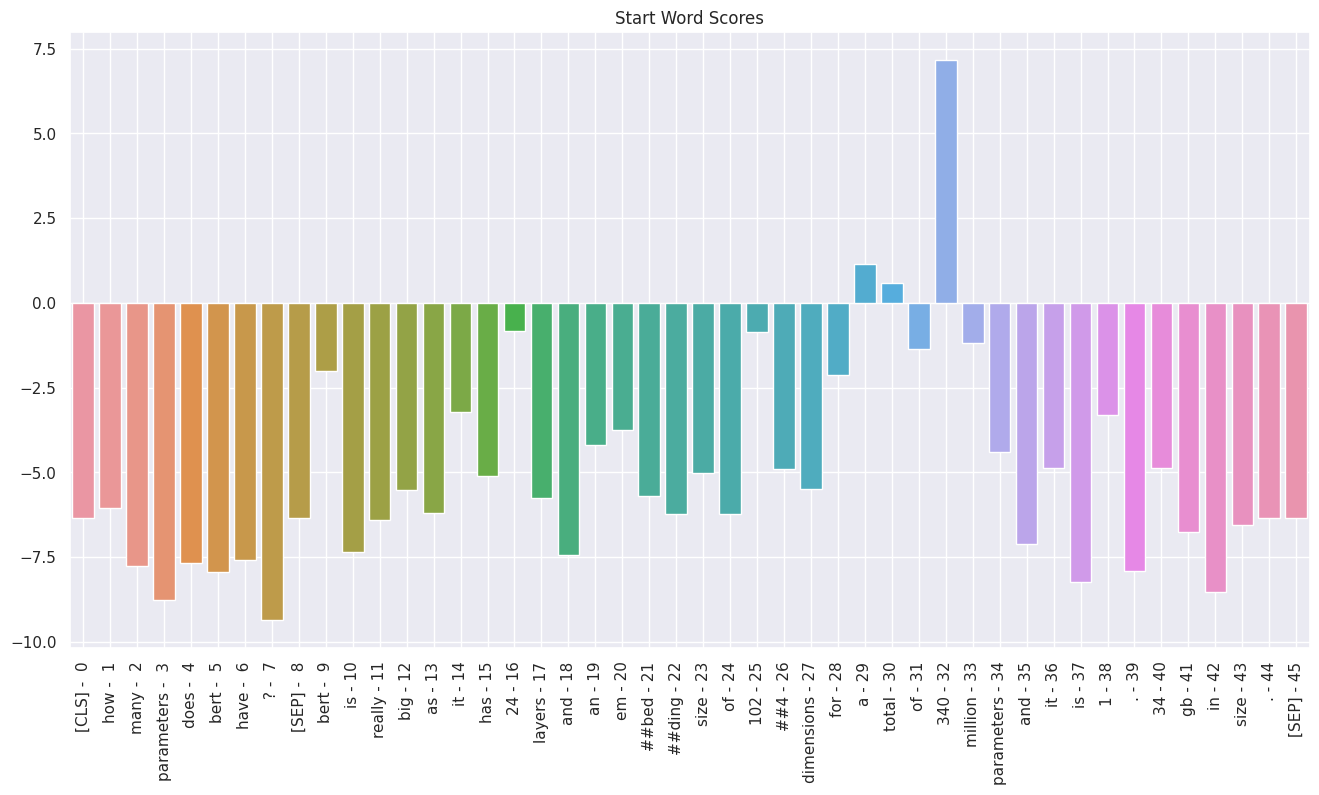

In [ ]:
ax = sns.barplot(x = token_labels,y = start,ci = None)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,ha = "center")
ax.grid(True)
plt.title("Start Word Scores")
plt.show()

<ipython-input-19-c481638b6eb6>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = token_labels,y = end,ci = None)


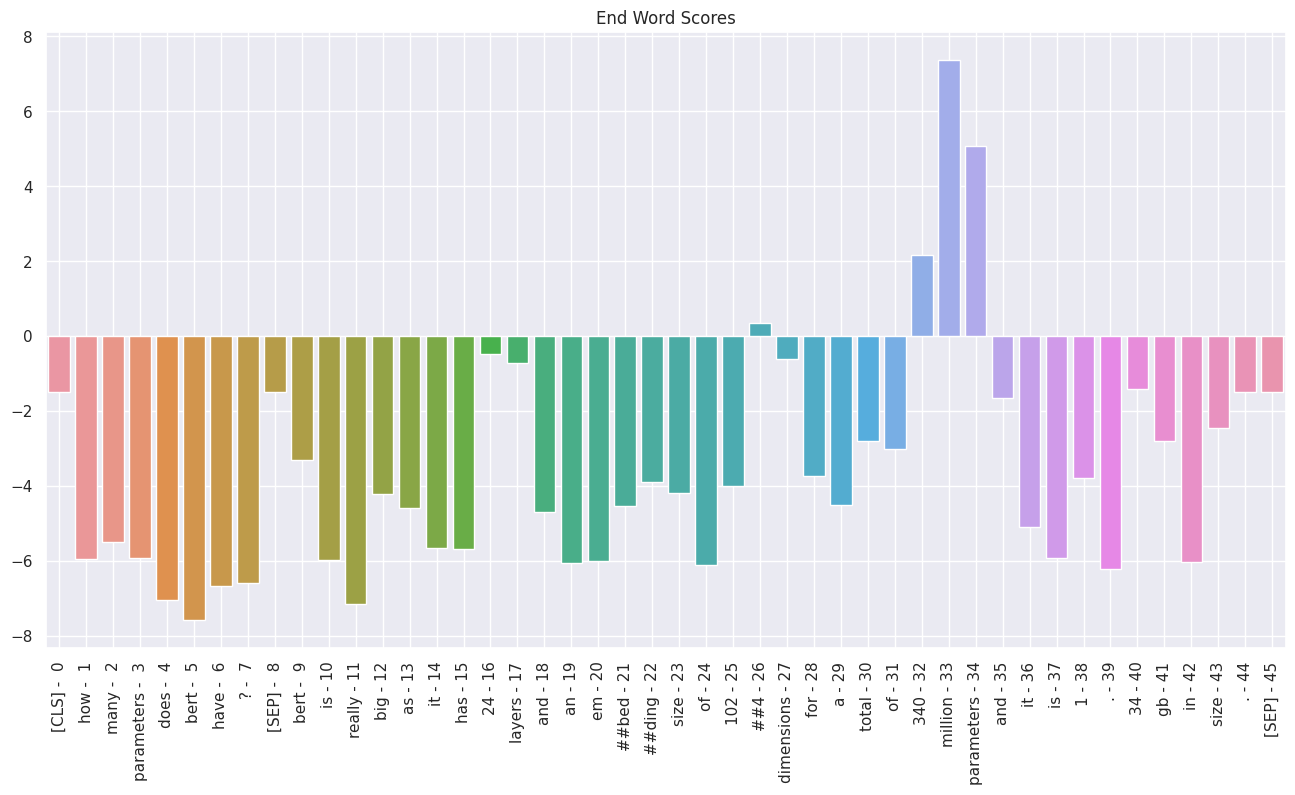

In [ ]:
ax = sns.barplot(x = token_labels,y = end,ci = None)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,ha = "center")
ax.grid(True)
plt.title("End Word Scores")
plt.show()

In [ ]:
scores = []

In [ ]:
for i,token_label in enumerate(token_labels):
  scores.append({"Token Label" : token_label,"Score" : start[i],"Marker" : "Start"})
  scores.append({"Token Label" : token_label,"Score" : end[i],"Marker" : "End"})

In [ ]:
df = pd.DataFrame(scores)

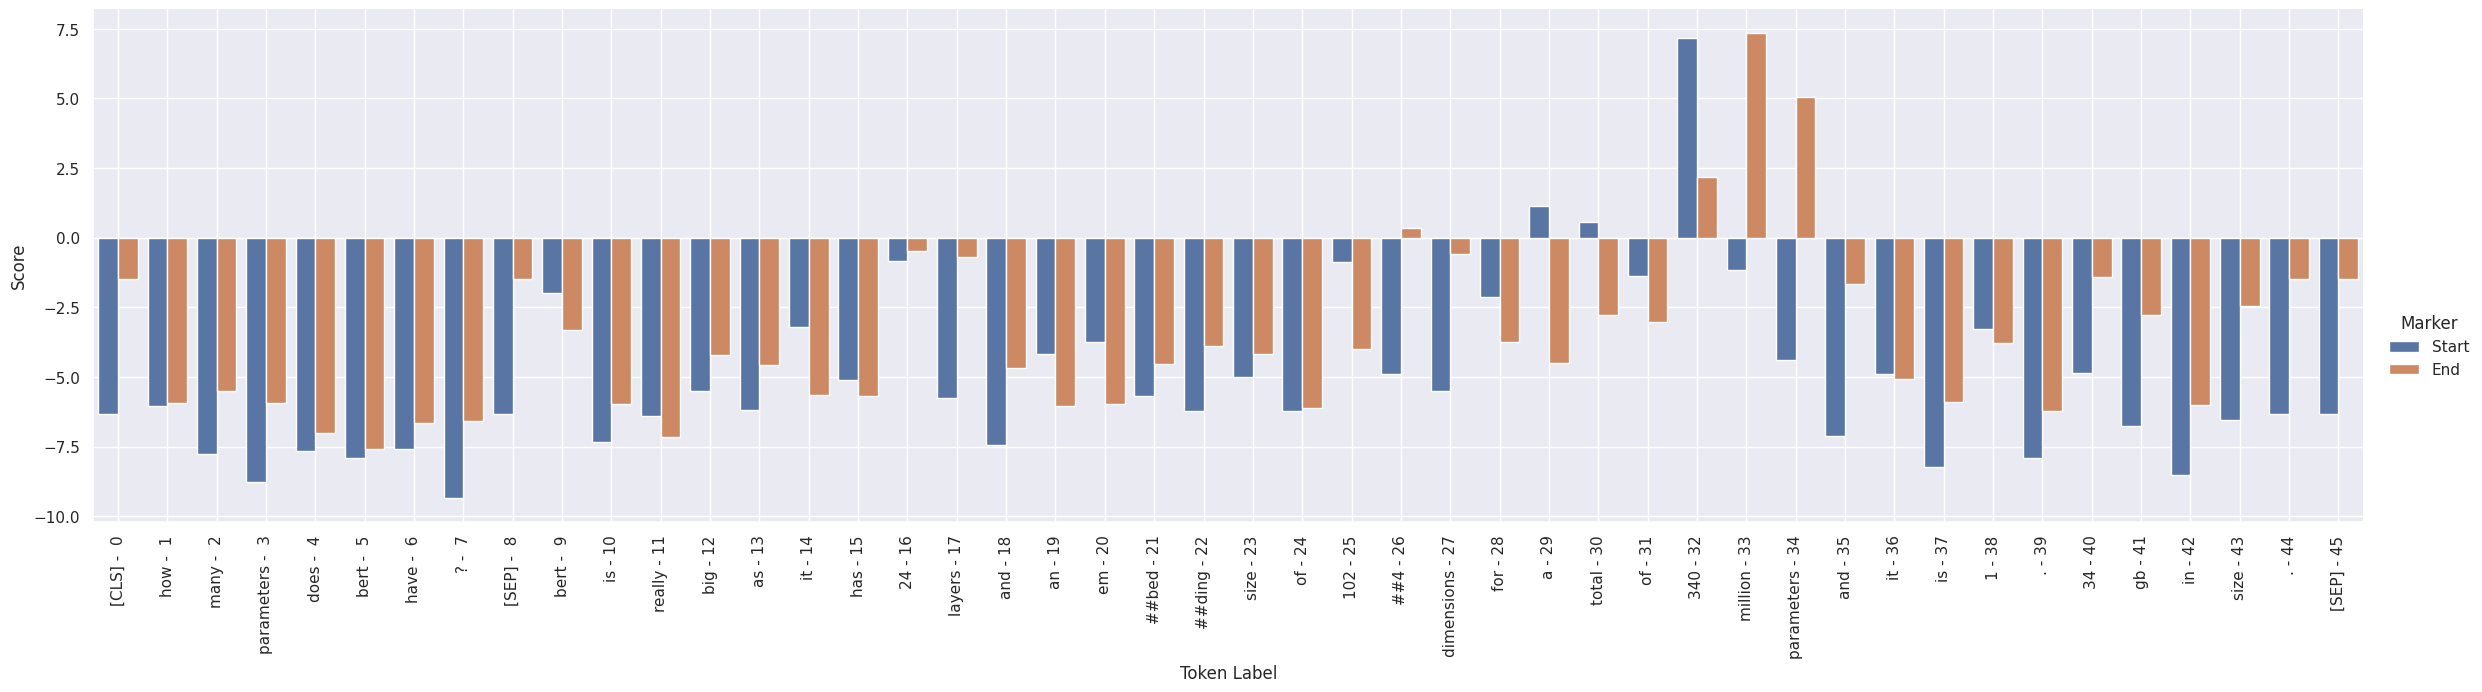

In [ ]:
g = sns.catplot(x = "Token Label",y = "Score",hue = "Marker",data = df,kind = "bar",height = 6,aspect = 4)
g.set_xticklabels(g.ax.get_xticklabels(),rotation = 90,ha = "center")
g.ax.grid(True)

In [ ]:
def question_answering(question,answer):

  input_ids = tokenizer.encode(question,answer)
  print("The query has a total of {:} tokens\n".format(len(input_ids)))
  separate_index = input_ids.index(tokenizer.sep_token_id)
  number_of_segment_a = separate_index + 1
  number_of_segment_b = len(input_ids) - number_of_segment_a
  segment_ids = [0] * number_of_segment_a + [1] * number_of_segment_b
  assert len(segment_ids) == len(input_ids)
  output = model(torch.tensor([input_ids]),token_type_ids = torch.tensor([segment_ids]),return_dict = True)
  start_scores = output.start_logits
  end_scores = output.end_logits
  start_answer = torch.argmax(start_scores)
  end_answer = torch.argmax(end_scores)
  tokens = tokenizer.convert_ids_to_tokens(input_ids)
  answer = tokens[start_answer]
  for i in range(start_answer + 1,end_answer + 1):
    if tokens[i][0:2] == "##":
      answer += tokens[i][2:]
    else:
      answer += " " + tokens[i]
  print("Answer :",answer)

In [ ]:
context = ("We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers. "
           "Unlike recent language representation models (Peters et al., 2018a; Radford et al., 2018), BERT is designed to pretrain deep bidirectional "
           "representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT "
           "model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks such as question "
           "answering and language inference, without substantial task specific architecture modifications. BERT is conceptually simple and empirically "
           "powerful. It obtains new state-of-the-art results on eleven natural language processing (NLP) tasks including pushing the BLEU score to 80.5 % "
           "(7.7 % point absolute improvement), MultiNLI accuracy to 86.7 % (4.6 % absolute improvement), SQuAD v1.1 question answering Test F1 to 93.2 (1.5 "
           "point absolute improvement) and SQuAD v2.0 Test F1 to 83.1 (5.1 point absolute improvement).")


In [ ]:
wrapped_context = textwrap.TextWrapper(width = 180)

In [ ]:
print(wrapped_context.fill(context))

We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers. Unlike recent language representation models
(Peters et al., 2018a; Radford et al., 2018), BERT is designed to pretrain deep bidirectional representations from unlabeled text by jointly conditioning on both left and right
context in all layers. As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks
such as question answering and language inference, without substantial task specific architecture modifications. BERT is conceptually simple and empirically powerful. It obtains
new state-of-the-art results on eleven natural language processing (NLP) tasks including pushing the BLEU score to 80.5 % (7.7 % point absolute improvement), MultiNLI accuracy to
86.7 % (4.6 % absolute improvement), SQuAD v1.1 question answering Test F1 to 93.2 (1.5 point absolute imp

In [ ]:
question = "What is the full form of BERT ?"
question_answering(question,context)

The query has a total of 256 tokens

Answer : bidirectional encoder representations from transformers


In [ ]:
question = "What are the applications of BERT ?"
question_answering(question,context)

The query has a total of 255 tokens

Answer : question answering and language inference


In [ ]:
question = "How many additional layer is required for fine-tuning ?"
question_answering(question,context)

The query has a total of 259 tokens

Answer : one


In [ ]:
question = "What is the bleu score of the model ?"
question_answering(question,context)

The query has a total of 259 tokens

Answer : 80 . 5 %


In [ ]:
question = "What is the F1 score of the SQuAD v2.0 model ?"
question_answering(question,context)

The query has a total of 262 tokens

Answer : 83 . 1


In [ ]:
question = "Is BERT model simple ?"
question_answering(question,context)

The query has a total of 253 tokens

Answer : conceptually simple
